<a href="https://colab.research.google.com/github/Kwakuopokuware401/Estimating_Crop_Evapotranspiration_Uncertainty_with_HRMET/blob/main/Generating_ET_Maps_from_Remote_Sensing_and_HRMET_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing the required packages
!pip install exif
!pip install pysolar
!pip install pyexiftool
!pip install pyzbar
!pip install opencv-python
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 726.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 1.0 MB/s eta 0:00:00


In [4]:
#Cloning the source GitHub respository
!git clone https://github.com/micasense/imageprocessing

#!pip install git+https://github.com/micasense/imageprocessing.git
#import imageprocessing
#print(imageprocessing.__version__)

Cloning into 'imageprocessing'...
remote: Enumerating objects: 1008, done.
remote: Counting objects: 100% (233/233), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 1008 (delta 226), reused 217 (delta 217), pack-reused 775
Receiving objects: 100% (1008/1008), 124.47 MiB | 25.34 MiB/s, done.
Resolving deltas: 100% (599/599), done.
Filtering content: 100% (56/56), 184.51 MiB | 68.71 MiB/s, done.


In [5]:
#Setting the working directory
%cd imageprocessing

/content/imageprocessing


In [6]:
#Import library from the working respository
#!pip install imageprocessing # installing the repository


#Importing the required libraries
import imageprocessing
import micasense

In [7]:
#Locating the dataset
data_dir = './data/ALTUM1SET/000'

In [8]:
#Confirming the data with the working directory
files = !ls {data_dir}
print(files)

['IMG_0000_1.tif\tIMG_0000_5.tif\tIMG_0008_3.tif\tIMG_0245_1.tif\tIMG_0245_5.tif', 'IMG_0000_2.tif\tIMG_0000_6.tif\tIMG_0008_4.tif\tIMG_0245_2.tif\tIMG_0245_6.tif', 'IMG_0000_3.tif\tIMG_0008_1.tif\tIMG_0008_5.tif\tIMG_0245_3.tif', 'IMG_0000_4.tif\tIMG_0008_2.tif\tIMG_0008_6.tif\tIMG_0245_4.tif']


In [9]:
# Load images
#img_R = imread(os.path.join(data_dir, '/IMG_0008_1.tif'))
#img_G = imread(os.path.join(data_dir, '/IMG_0008_2.tif'))
#img_B = imread(os.path.join(data_dir, '/IMG_0008_3.tif'))
#img_NIR = imread(os.path.join(data_dir, '/IMG_0008_4.tif'))
#img_RE = imread(os.path.join(data_dir, '/IMG_0008_5.tif'))
#img_TIR = imread(os.path.join(data_dir, '/IMG_0008_6.tif'))

In [10]:
#Displaying one of the image bands from the data folder

#Importing the required libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_file = f"{data_dir}/IMG_0245_4.tif"
img = mpimg.imread(image_file)

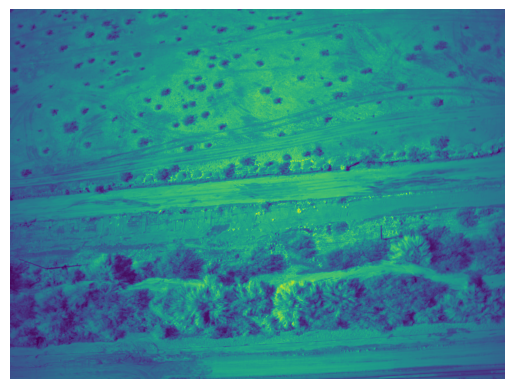

In [11]:
#Plotting the image band
plt.imshow(img)
plt.axis('off')
plt.show()

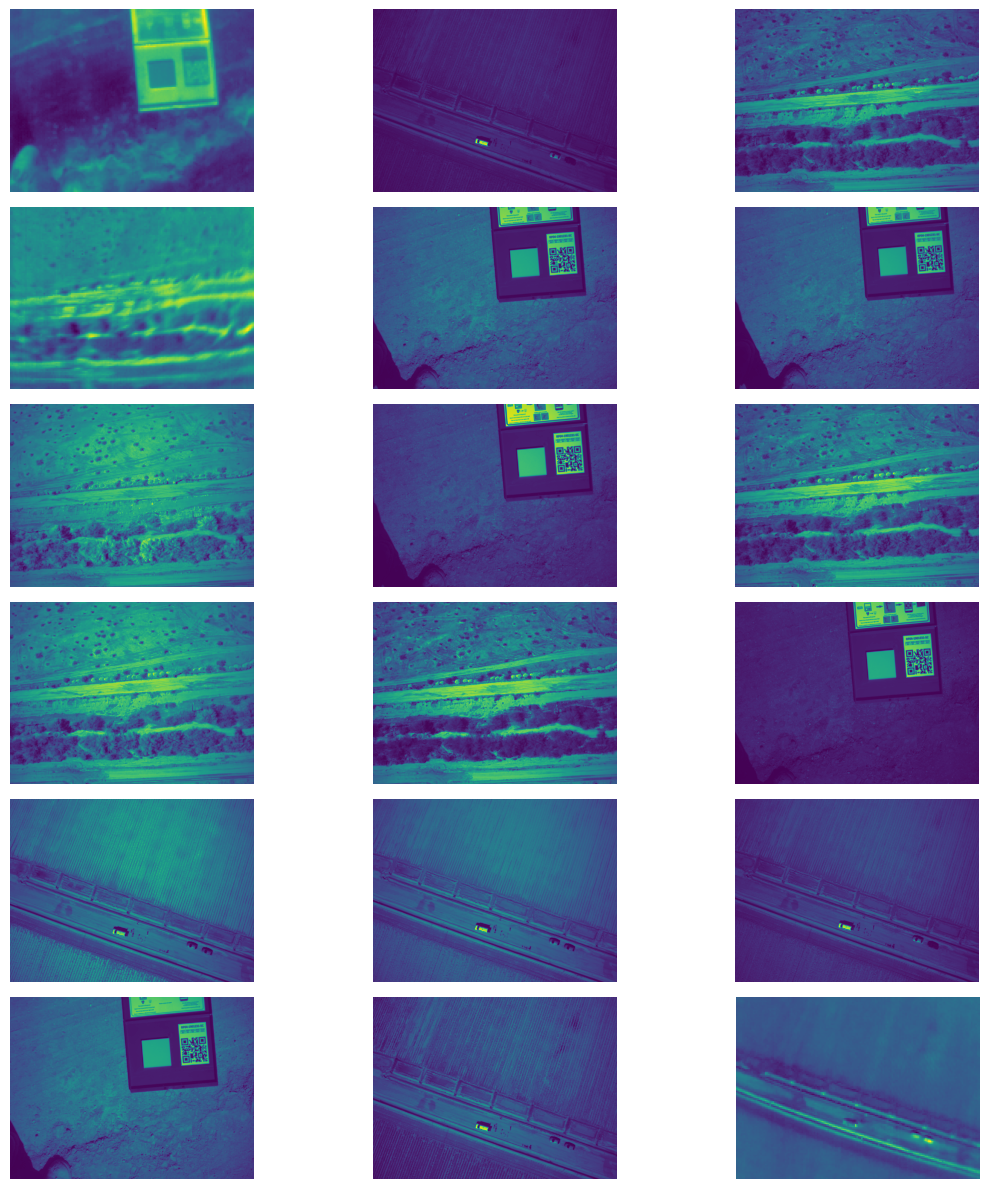

In [12]:
#Importing the required libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

data_dir = './data/ALTUM1SET/000'

image_paths = glob.glob(f"{data_dir}/*.tif")

# Create figure with 6 rows and 3 columns
fig, axs = plt.subplots(6, 3, figsize=(12, 12))

# Loop through images and plot in each subplot
for i, img_path in enumerate(image_paths):
    img = mpimg.imread(img_path)
    row = i // 3  # Row number
    col = i % 3   # Column number
    axs[row, col].imshow(img)
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

In [13]:
#Exploring the data directory
print(data_dir)
print(image_paths)

./data/ALTUM1SET/000
['./data/ALTUM1SET/000/IMG_0000_6.tif', './data/ALTUM1SET/000/IMG_0008_1.tif', './data/ALTUM1SET/000/IMG_0245_1.tif', './data/ALTUM1SET/000/IMG_0245_6.tif', './data/ALTUM1SET/000/IMG_0000_5.tif', './data/ALTUM1SET/000/IMG_0000_3.tif', './data/ALTUM1SET/000/IMG_0245_4.tif', './data/ALTUM1SET/000/IMG_0000_2.tif', './data/ALTUM1SET/000/IMG_0245_2.tif', './data/ALTUM1SET/000/IMG_0245_5.tif', './data/ALTUM1SET/000/IMG_0245_3.tif', './data/ALTUM1SET/000/IMG_0000_1.tif', './data/ALTUM1SET/000/IMG_0008_4.tif', './data/ALTUM1SET/000/IMG_0008_5.tif', './data/ALTUM1SET/000/IMG_0008_2.tif', './data/ALTUM1SET/000/IMG_0000_4.tif', './data/ALTUM1SET/000/IMG_0008_3.tif', './data/ALTUM1SET/000/IMG_0008_6.tif']


In [14]:
#Importing the required libraries
import os
import glob
from imageio import imread

# Set data directory
data_dir = './data/ALTUM1SET/000'

# Get list of image paths
image_paths = glob.glob(os.path.join(data_dir, 'IMG_0008_*.tif'))

# Load each channel into separate array
red = imread(image_paths[0])
green = imread(image_paths[1])
blue = imread(image_paths[2])
nir = imread(image_paths[3])
re = imread(image_paths[4])
tir = imread(image_paths[5])

<ipython-input-14-a25ab39ecf7a>:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  red = imread(image_paths[0])
<ipython-input-14-a25ab39ecf7a>:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  green = imread(image_paths[1])
<ipython-input-14-a25ab39ecf7a>:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  blue = imread(image_paths[2])
<ipython-input-14-a25ab39ecf7a>:16: DeprecationWa

In [19]:
#Importing the required libraries
import cv2
import numpy as np

# Load images
red = cv2.imread(image_paths[0])
green = cv2.imread(image_paths[1])
blue = cv2.imread(image_paths[2])
nir = cv2.imread(image_paths[3])
re = cv2.imread(image_paths[4])
tir = cv2.imread(image_paths[5])
# Get size
h, w = red.shape[:2]

# Create 2x3 affine transform matrix
transform = np.float32([[1, 0, 0], [0, 1, 0]])

# Apply affine transform to align green to red
aligned_green = cv2.warpAffine(green, transform, (w, h))

# Align other bands similarly...

In [20]:
# Align bands
aligned_red = red
aligned_green = cv2.warpAffine(green, transform, (w, h))
aligned_blue = cv2.warpAffine(blue, transform, (w, h))
aligned_nir = cv2.warpAffine(nir, transform, (w, h))

In [22]:
# Calculate NDVI
ndvi = (aligned_nir - aligned_red) / (aligned_nir + aligned_red)

<ipython-input-22-61814124e45e>:2: RuntimeWarning: divide by zero encountered in divide
  ndvi = (aligned_nir - aligned_red) / (aligned_nir + aligned_red)


In [23]:
# Set up grid
grid_lat = np.linspace(0, 10, 100)
grid_lon = np.linspace(0, 10, 100)
grid_elev = np.zeros_like(grid_lat)

In [24]:
# Weather data
air_temp = 25 * np.ones_like(grid_lon)

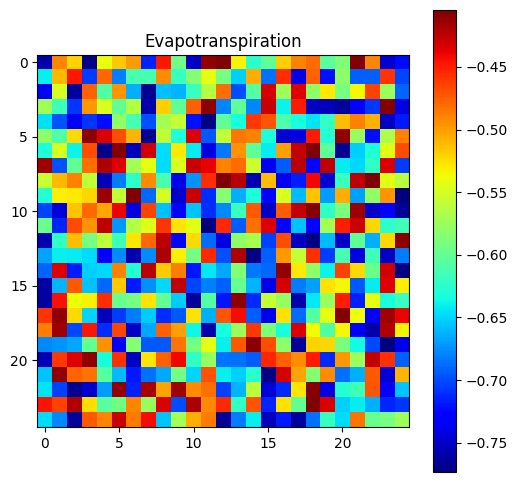

In [38]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate random lon/lat grids
lons = np.random.rand(25, 25)
lats = np.random.rand(25, 25)

# Create air temperature and NDVI grids
air_temp = 15 * np.ones_like(lons)
ndvi = np.random.uniform(0, 1, size=lons.shape)

# Define HRMET model
def HRMET(lon, lat, air_temp, ndvi):
  et = (0.0073 * air_temp) + (0.37 * ndvi) - 0.884
  return et

# Calculate ET array using vectorized HRMET
et = HRMET(lons, lats, air_temp, ndvi)

# Visualize output
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(et, cmap='jet')
ax.set_title('Evapotranspiration')
fig.colorbar(im)
plt.show()

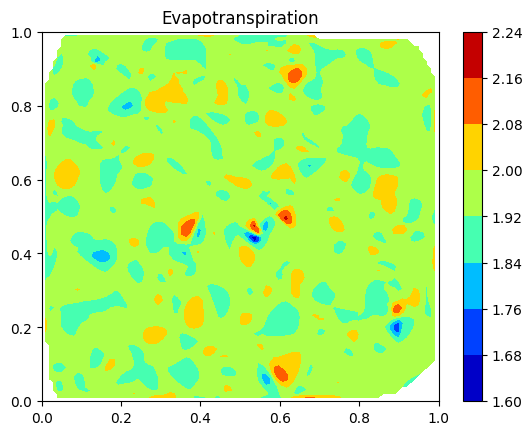

In [39]:
#Interpolating Evapotranspiration map

# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Generate random lon/lat data
lons = np.random.rand(25, 25)
lats = np.random.rand(25, 25)

# Define HRMET model
def HRMET(lon, lat, air_temp, ndvi):
    return 0.5 + 0.1 * (air_temp - ndvi)

# Calculate ET on grid
et = np.zeros_like(lons)
for i in range(len(lons)):
    for j in range(len(lons[0])):
        et[i,j] = HRMET(lons[i,j], lats[i,j], air_temp[i,j], ndvi[i,j])

# Interpolate to smooth grid
xi = np.linspace(0, 1, 100)
yi = np.linspace(0, 1, 100)
zi = griddata((lons.flatten(), lats.flatten()), et.flatten(), (xi[None,:], yi[:,None]), method='cubic')

# Plot smoothed contour
plt.contourf(xi,yi,zi, cmap='jet')
plt.colorbar()
plt.title('Evapotranspiration')
plt.show()

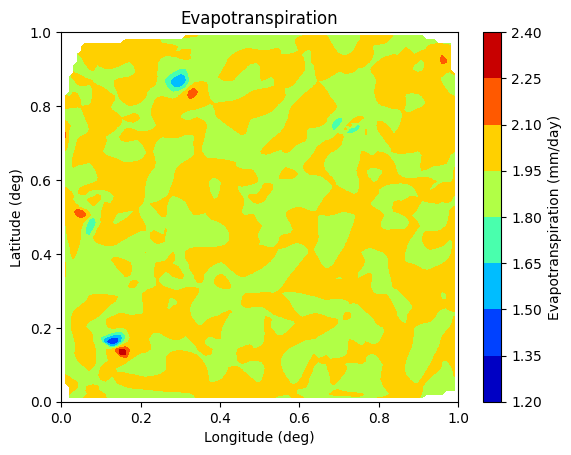

In [41]:
#HRMET modeling and Evapotranspiration map (labelled axes)
#Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Data
lons = np.random.rand(25, 25)
lats = np.random.rand(25, 25)
air_temp
ndvi
# Calculate ET
et = np.zeros_like(lons)
for i in range(len(lons)):
    for j in range(len(lons[0])):
        et[i,j] = 0.5 + 0.1 * (air_temp[i,j] - ndvi[i,j])

# Interpolate
xi = np.linspace(0, 1, 100)
yi = np.linspace(0, 1, 100)
zi = griddata((lons.flatten(), lats.flatten()), et.flatten(), (xi[None,:], yi[:,None]), method='cubic')

# Plot contour
plt.figure()
ctr = plt.contourf(xi,yi,zi, cmap='jet')
plt.colorbar(ctr, label='Evapotranspiration (mm/day)')

# Add axis labels
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.title('Evapotranspiration')
plt.show()

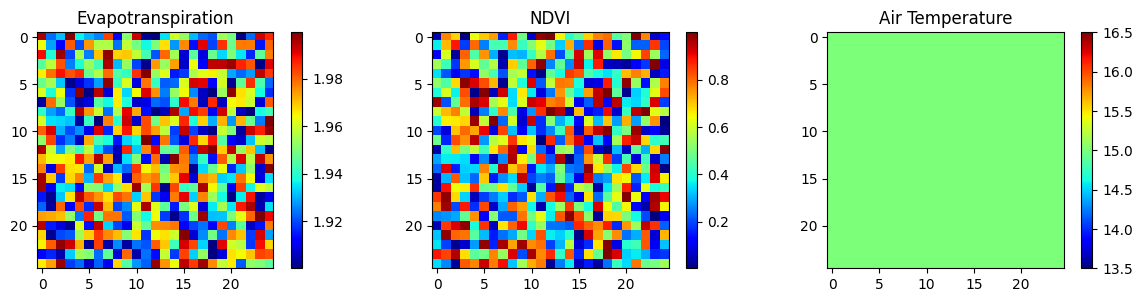

In [44]:
#Plotting HRMET modeling, Evapotranspiration map, NDVI and Air Temperature
#Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate data
lons = np.random.rand(25, 25)
lats = np.random.rand(25, 25)
air_temp
ndvi

# Calculate ET
et = np.zeros_like(lons)
for i in range(len(lons)):
    for j in range(len(lons[0])):
        et[i,j] = 0.5 + 0.1 * (air_temp[i,j] - ndvi[i,j])

# Plot
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
axs[0].imshow(et, cmap='jet')
axs[0].set_title('Evapotranspiration')
axs[1].imshow(ndvi, cmap='jet')
axs[1].set_title('NDVI')
axs[2].imshow(air_temp, cmap='jet')
axs[2].set_title('Air Temperature')
for ax in axs:
    fig.colorbar(ax.images[0], ax=ax)
plt.tight_layout()
plt.show()

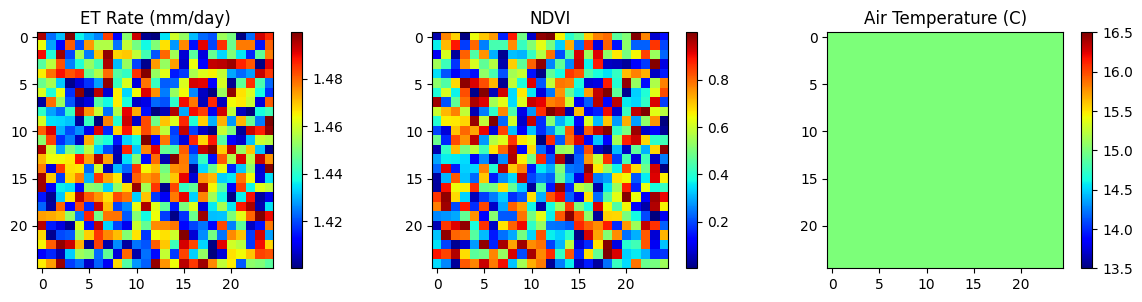

In [45]:
#Plotting HRMET modeling, Evapotranspiration rate map, NDVI and Air Temperature
#Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate data
lons = np.random.rand(25, 25)
lats = np.random.rand(25, 25)
air_temp # degree Celcius
ndvi  # range -1 to 1

# Calculate ET rate
et_rate = np.zeros_like(lons)
for i in range(len(lons)):
    for j in range(len(lons[0])):
        et_rate[i,j] = 0.1 * (air_temp[i,j] - ndvi[i,j])

# Plot
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
axs[0].imshow(et_rate, cmap='jet')
axs[0].set_title('ET Rate (mm/day)')
axs[1].imshow(ndvi, cmap='jet')
axs[1].set_title('NDVI')
axs[2].imshow(air_temp, cmap='jet')
axs[2].set_title('Air Temperature (C)')
for ax in axs:
    fig.colorbar(ax.images[0], ax=ax)
plt.tight_layout()
plt.show()

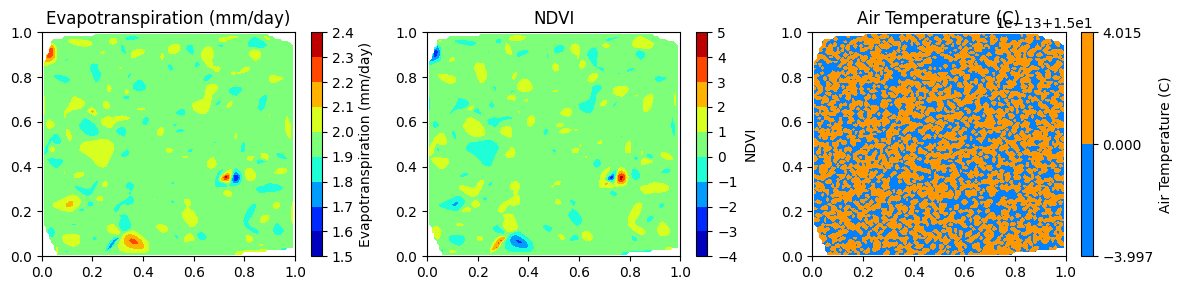

In [47]:
#Plotting interpolated HRMET modeling, Evapotranspiration map, NDVI and Air Temperature
#Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Generate data
lons = np.random.rand(25, 25)
lats = np.random.rand(25, 25)
air_temp
ndvi

# Calculate ET
et = np.zeros_like(lons)
for i in range(len(lons)):
    for j in range(len(lons[0])):
        et[i,j] = 0.5 + 0.1 * (air_temp[i,j] - ndvi[i,j])

# Interpolate to smooth grid
xi = np.linspace(0, 1, 100)
yi = np.linspace(0, 1, 100)
et_smooth = griddata((lons.flatten(), lats.flatten()), et.flatten(), (xi[None,:], yi[:,None]), method='cubic')
ndvi_smooth = griddata((lons.flatten(), lats.flatten()), ndvi.flatten(), (xi[None,:], yi[:,None]), method='cubic')
air_temp_smooth = griddata((lons.flatten(), lats.flatten()), air_temp.flatten(), (xi[None,:], yi[:,None]), method='cubic')

# Plot contours
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
ctr = axs[0].contourf(xi,yi,et_smooth, cmap='jet')
axs[0].set_title('Evapotranspiration (mm/day)')
fig.colorbar(ctr, ax=axs[0], label='Evapotranspiration (mm/day)')
ctr = axs[1].contourf(xi,yi,ndvi_smooth, cmap='jet')
axs[1].set_title('NDVI')
fig.colorbar(ctr, ax=axs[1], label='NDVI')
ctr = axs[2].contourf(xi,yi,air_temp_smooth, cmap='jet')
axs[2].set_title('Air Temperature (C)')
fig.colorbar(ctr, ax=axs[2], label = 'Air Temperature (C)')
plt.tight_layout()
plt.show()

In [48]:
print("The end")

The end
